# Overfitting Problem
This is a continuation of the overfitting problem we saw previously. This will be a scratch notebook for doing fast experiments.

## Very quickly, we test an old version of the algorithm tosee if this will work

In [10]:
import numpy as np
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

def estimate_conditional_entropy(X, y, n_estimators = 200, max_depth = None, bootstrap = True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = RandomForestClassifier(n_estimators =n_estimators, max_depth = None, random_state = 0, bootstrap = bootstrap)
    model.fit(X_train, y_train)
    tree_entropies = []
    x_counts = []
    n_trees = 0
    for tree_in_forest in model:
        n_trees += 1
        unique, counts = np.unique(tree_in_forest.apply(X_train), return_counts = True)
        n = counts.sum()
        # get count of number of elements in each leaf partition
        binCount = dict(zip(unique, counts))
        # get probabilities
        probs = tree_in_forest.predict_proba(X_test)
        # get entropies in each leaf
        entropies = np.nan_to_num(-np.sum(np.log(probs)*probs, axis = 1))
        # get leaf assignment in order to pair up with leaf count
        leaf_counts = np.vectorize(binCount.get)(tree_in_forest.apply(X_test))
        x_counts.append(leaf_counts)
        tree_entropies.append(entropies*leaf_counts)
    cond_entropies = sum(tree_entropies) / sum(x_counts)
    # take average
    return np.sum(cond_entropies) / len(cond_entropies)

In [11]:
x = [0]*20 + [1]*20 + [2]*20 + [3]*20
y = [0, 1, 0, 1, 0]*4 + [ 1, 1, 1, 1, 0]*4 + [1, 0, 1, 0, 1]*4 + [0, 0, 0, 0, 1]*4
X = np.array(x).reshape(-1, 1)
y = np.array(y)

In [39]:
import numpy as np
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

def estimate_conditional_entropy(X, y, n_estimators = 200, max_depth = None, bootstrap = True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = RandomForestClassifier(n_estimators =n_estimators, max_depth = None, random_state = 0, bootstrap = bootstrap)
    model.fit(X_train, y_train)
    x_counts = np.zeros((X_test.shape[0], 2))
    for tree_ in model:
        for i in range(X_test.shape[0]):
    for i in range(X_test.shape[0]):
        for tree_ in model:
            prediction = tree_.predict(X_test[i].reshape(-1, 1))
            x_counts[i, int(prediction)] += 1
    print(x_counts)
    return 0

X, y = get_sample(1000, 0, 1)
X = np.array(X).reshape(-1, 1)
estimate_conditional_entropy(X, y)

[[138.  62.]
 [ 17. 183.]
 [188.  12.]
 [ 41. 159.]
 [132.  68.]
 [193.   7.]
 [136.  64.]
 [ 26. 174.]
 [ 26. 174.]
 [ 21. 179.]
 [ 66. 134.]
 [145.  55.]
 [ 65. 135.]
 [  4. 196.]
 [149.  51.]
 [200.   0.]
 [149.  51.]
 [144.  56.]
 [147.  53.]
 [  2. 198.]
 [  1. 199.]
 [  5. 195.]
 [182.  18.]
 [ 29. 171.]
 [158.  42.]
 [ 57. 143.]
 [125.  75.]
 [132.  68.]
 [  7. 193.]
 [ 51. 149.]
 [  0. 200.]
 [ 51. 149.]
 [ 41. 159.]
 [169.  31.]
 [ 18. 182.]
 [ 24. 176.]
 [200.   0.]
 [138.  62.]
 [149.  51.]
 [175.  25.]
 [150.  50.]
 [ 48. 152.]
 [ 64. 136.]
 [ 56. 144.]
 [181.  19.]
 [181.  19.]
 [ 49. 151.]
 [177.  23.]
 [ 71. 129.]
 [ 26. 174.]
 [147.  53.]
 [ 27. 173.]
 [181.  19.]
 [184.  16.]
 [  0. 200.]
 [ 28. 172.]
 [  6. 194.]
 [ 26. 174.]
 [190.  10.]
 [191.   9.]
 [151.  49.]
 [147.  53.]
 [ 44. 156.]
 [ 38. 162.]
 [130.  70.]
 [ 57. 143.]
 [175.  25.]
 [  1. 199.]
 [ 82. 118.]
 [ 26. 174.]
 [155.  45.]
 [199.   1.]
 [ 49. 151.]
 [ 43. 157.]
 [ 22. 178.]
 [140.  60.]
 [132.  68.]

0

# sampling code

In [13]:
def get_sample(n, mean, var):
    x_sample = []
    y_sample = []
    for i in range(n):
        y = np.random.binomial(1, .5)
        if (y == 0):
            x = np.random.normal(-mean, var)
        else:
            x = np.random.normal(mean, var)
        x_sample.append(x)
        y_sample.append(y)
    return x_sample, y_sample

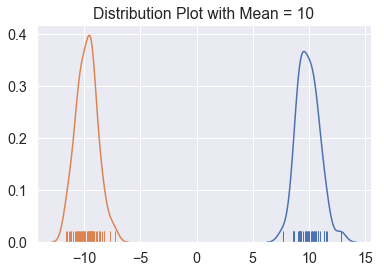

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)

def split_by_class(sample):
    y_one = [pair for pair in sample if pair[1] == 1]
    y_neg_one = [pair for pair in sample if pair[1] == 0]
    return y_one, y_neg_one

X, y = get_sample(100, 10, 1)
sample = list(zip(X, y))
class_one, class_neg_one = split_by_class(sample)
sns.distplot(list(zip(*class_one))[0], hist=False, rug=True)
sns.distplot(list(zip(*class_neg_one))[0], hist=False, rug=True)
plt.title("Distribution Plot with Mean = 10")
plt.show()

0.0


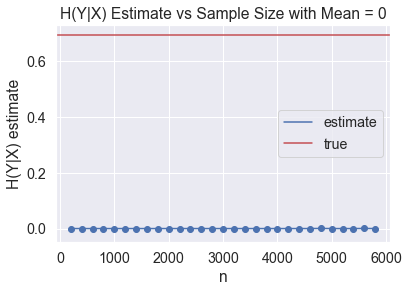

In [19]:
np.warnings.filterwarnings('ignore')

def get_cond_entropy_vs_n(mean):
    conditional_entropy = []
    sample_sizes = [i*200 for i in range(1, 30)]
    for elem in sample_sizes:
        X, y = get_sample(elem, mean, 1)
        conditional_entropy.append(estimate_conditional_entropy(np.array(X).reshape(-1, 1), y, 200, bootstrap = False))
    return sample_sizes, conditional_entropy


sample_sizes, cond_entropy = get_cond_entropy_vs_n(0)
print(cond_entropy[-1])
plt.scatter(sample_sizes, cond_entropy)
line_est, = plt.plot(sample_sizes, cond_entropy, label = "estimate")
line_true = plt.axhline(y=.69315, color='r', linestyle='-', label = "true")
plt.xlabel("n")
plt.ylabel("H(Y|X) estimate")
plt.legend(handles=[line_est, line_true])
plt.title("H(Y|X) Estimate vs Sample Size with Mean = 0")
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from scipy.stats import entropy

def estimate_conditional_entropy(X, y, n_trees = 10, max_depth = None, bootstrap = False):
    model = RandomForestClassifier(bootstrap = bootstrap, n_estimators =n_trees, max_depth = max_depth, random_state = 0)
    model.fit(X, y)
    class_counts = np.zeros((X.shape[0], model.n_classes_))
    for tree_in_forest in model:
        # get number of training elements in each partition
        node_counts = tree_in_forest.tree_.n_node_samples
        # get counts for all x (x.length array)
        partition_counts = np.asarray([node_counts[x] for x in tree_in_forest.apply(X)])
        # get class probability for all x (x.length, n_classes)
        class_probs = tree_in_forest.predict_proba(X)
        # get elements by performing row wise multiplication
        elems = np.multiply(class_probs, partition_counts[:, np.newaxis])
        # update counts for that tree
        class_counts += elems
    probs = class_counts/class_counts.sum(axis=1, keepdims=True)
    entropies = -np.sum(np.log(probs)*probs, axis = 1)
    # convert nan to 0
    entropies = np.nan_to_num(entropies)
    return np.mean(entropies)

0.6798123270883087


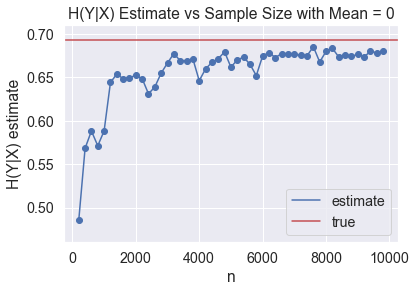

In [52]:
def get_cond_entropy_vs_n(mean):
    conditional_entropy = []
    sample_sizes = [i*200 for i in range(1, 50)]
    for elem in sample_sizes:
        X, y = get_sample(elem, mean, 1)
        conditional_entropy.append(estimate_conditional_entropy(np.array(X).reshape(-1, 1), y, 200, max_depth = 8, bootstrap = False))
    return sample_sizes, conditional_entropy

sample_sizes, cond_entropy = get_cond_entropy_vs_n(0)
print(cond_entropy[-1])
plt.scatter(sample_sizes, cond_entropy)
line_est, = plt.plot(sample_sizes, cond_entropy, label = "estimate")
line_true = plt.axhline(y=.69315, color='r', linestyle='-', label = "true")
plt.xlabel("n")
plt.ylabel("H(Y|X) estimate")
plt.legend(handles=[line_est, line_true])
plt.title("H(Y|X) Estimate vs Sample Size with Mean = 0")
plt.show()